# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [78]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from pandas.io.json import json_normalize

In [2]:
## Loading json file as pandas dataframe
df = pd.read_json('data/world_bank_projects.json')

In [7]:
## Explore the dataframe
df.head(50)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 87, 'Name': 'Other rural developme...","[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{'$oid': '52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{'Percent': 33, 'Name': 'Other accountability/...","[{'code': '29', 'name': 'Other accountability/...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


In [4]:
df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [8]:
df.describe()

,approvalfy,grantamt,ibrdcommamt,idacommamt,lendprojectcost,totalamt,totalcommamt
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2013.108000,4.432400e+06,3.286010e+07,3.542136e+07,1.547241e+08,6.828146e+07,7.271386e+07
std,0.722066,2.023307e+07,1.089197e+08,7.681431e+07,4.764211e+08,1.242662e+08,1.234705e+08
min,1999.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+04,0.000000e+00,3.000000e+04
25%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.472500e+06,0.000000e+00,5.000000e+06
50%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+07,2.000000e+07,2.500000e+07
75%,2013.000000,1.695000e+06,0.000000e+00,3.700000e+07,1.021250e+08,8.625000e+07,9.045000e+07
max,2015.000000,3.650000e+08,1.307800e+09,6.000000e+08,5.170000e+09,1.307800e+09,1.307800e+09


## 1.) The 10 countries with the most projects

In [18]:
# Take value counts of the 'countryshortname' column
country_counts = df['countryshortname'].value_counts().sort_values(ascending=False)

In [80]:
# Top 10 countries by most projects
top_ten = country_counts.head(10)
top_ten

Indonesia                           19
China                               19
Vietnam                             17
India                               16
Yemen, Republic of                  13
Nepal                               12
Morocco                             12
Bangladesh                          12
Mozambique                          11
Africa                              11
Burkina Faso                         9
Pakistan                             9
Brazil                               9
Tajikistan                           8
Armenia                              8
Tanzania                             8
Lao People's Democratic Republic     7
Kyrgyz Republic                      7
Nigeria                              7
Jordan                               7
Name: countryshortname, dtype: int64

### Africa is not a country, so this value will be filtered out.

In [81]:
country_counts = df[df['countryshortname']!='Africa']['countryshortname'].value_counts().sort_values(ascending=False)

In [82]:
top_ten = country_counts.head(10)
top_ten

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Morocco               12
Nepal                 12
Mozambique            11
Brazil                 9
Name: countryshortname, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

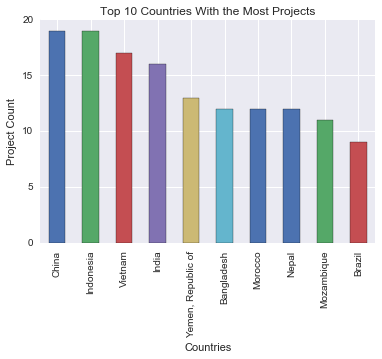

In [156]:
# Build plot
cc = country_counts.head(10).plot(kind='bar')

# Set title, axis labels
cc.set_title('Top 10 Countries With the Most Projects')
cc.set_ylabel('Project Count')
cc.set_xlabel('Countries')
plt.xticks(rotation='vertical')

## 2.) Top 10 major project themes (using column 'mjtheme_namecode')

In [67]:
# Load json as string
data = json.load((open('data/world_bank_projects.json')))

In [69]:
# Use normalization to create a table from nested element, 'mjtheme_namecode'
data_norm = json_normalize(data, 'mjtheme_namecode')

In [86]:
# Retrieve value counts of the theme CODES (including null values for names)
code_counts = data_norm['code'].value_counts().sort_values(ascending=False)

In [87]:
code_counts

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
3      15
Name: code, dtype: int64

Text(0.5,0,'Code')

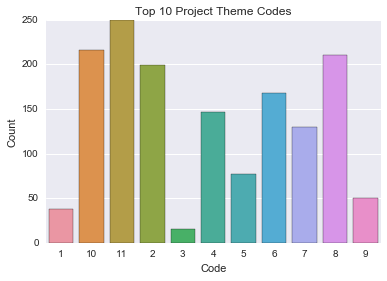

In [100]:
# Build bar plot
code_plot = sns.barplot(x=data_norm['code'].value_counts().index, y=data_norm['code'].value_counts())

# Set title, axis labels
code_plot.set_title('Top 10 Project Theme Codes')
code_plot.set_ylabel('Count')
code_plot.set_xlabel('Code')

## 3.) Dataframe with missing code names filled

In [106]:
data_norm.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [129]:
# sort the data by 'code'
dn_sort = data_norm.sort_values('code')

# replace '' with the prior value in the series 
dn_sort['name'] = dn_sort['name'].replace('',method='pad')
dn_sort.reset_index(inplace=True)
dn_sort.drop('index',axis=1, inplace=True)

In [131]:
dn_sort['name'].value_counts()

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64

In [147]:
dn_sort.head()

,code,name
0,1,Economic management
1,1,Economic management
2,1,Economic management
3,1,Economic management
4,1,Economic management


## Top 10 Project Themes re-visualized (with names)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

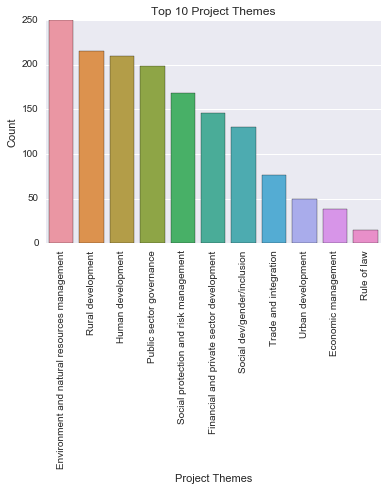

In [151]:
names_plot = sns.barplot(x=dn_sort['name'].value_counts().index, y=dn_sort['code'].value_counts())

# Set title, axis labels
names_plot.set_title('Top 10 Project Themes')
names_plot.set_ylabel('Count')
names_plot.set_xlabel('Project Themes')
plt.xticks(rotation='vertical')